Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def init_parameters():

    W1 = np.random.randn(2, 2)
    b1 = np.zeros((2,1))
    W2 = np.random.randn(1,2)
    b2 = np.zeros((1,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [3]:
#init_parameters()

In [4]:
# Sigmoid_function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [5]:
def derivative_sigmoid(s):
    #s = sigmoid(x)
    ds = s*(1-s)
    return ds

In [6]:
def forward_propagation(X, parameters):
    # paramters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # function first neuron
    X = np.reshape(X,(2,1))
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    #print(X)
    #print(A1)
    # Function second neuron
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2

    # Cache to back_propagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [7]:
# matriz_X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
# A2, cahe = forward_propagation(matriz_X[1,:],parameters)
# print(A2)

In [8]:
def compute_cost(A2, Y):
    Y = np.reshape(Y,(1,1))
    #
    #logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    #cost = -np.sum(logprobs) / 4
    #
    cost =(Y - A2)
    #cost = float(cost)

    return cost

In [19]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """

    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    ### END CODE HERE ###

    # Backward propagation: calculate dW1, db1, dW2, db2.
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
#     Calculate dW, db
    X = np.reshape(X,(2,1))
    Y = np.reshape(Y,(1,1))
    dZ2 = -2*(Y-A2)
    dW2 = np.dot(dZ2, A1.T)
    # print(f'dW2',dW2)
    # db2 = np.sum(dZ2, axis=1, keepdims=True)
    db2 = dZ2
    dZ1 = np.multiply(np.dot(W2.T, dZ2), derivative_sigmoid(A1))
    dW1 = np.dot(dZ1, X.T)
    # db1 = np.sum(dZ1, axis=1, keepdims=True)
    db1 = dZ1
    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [20]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###

    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [21]:
# NN_model
def nn_model(X, Y, learning_rate, num_iterations):
    # Initialize parameters
    parameters = init_parameters()
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #A2=[]
    MSE=[]
    error=[]
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        #e=[]
        for j in range (4):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
            A2, cache = forward_propagation(X[j,:], parameters)
            #print(cache["A1"])
            error = compute_cost(A2, Y[j])
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
            grads = backward_propagation(parameters, cache, X[j,:], Y[j])
        # Update rule for each parameter
            parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        # Returns parameters learnt by the model. They can then be used to predict output
            #print(error)
        #error.append(e)
            cost =  np.sum(np.power(error,2))

        MSE = cost/4
        #hola=[MSE]
        #plt.figure()
        #plt.scatter(i, MSE)
        #plt.show()
        plt.plot(i,MSE,'bo')
        #plt.show()
        #
            #Print the cost every 1000 iterations
        #if error and i % 1000 == 0:
            #print ("Cost after iteration %i: %f" %(i, error))
    return parameters


(4, 2)
(4, 1)


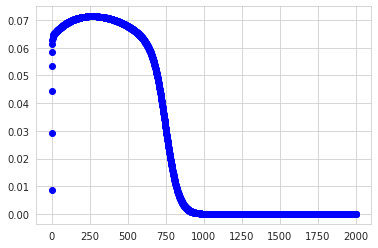

In [27]:
# Pequeñna neurona
matriz_X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
matriz_Y = np.array([[0],[1],[1],[0]])
# print(matriz.shape)
print(matriz_X.shape)
print(matriz_Y.shape)

# Build a model with a n_h-dimensional hidden layer

parameters = nn_model(matriz_X, matriz_Y, 0.05 , num_iterations = 2000)

In [28]:

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###

    return predictions, A2

In [29]:
print(predict(parameters, matriz_X[2,:]))

(array([[ True]]), array([[0.99999998]]))
